In [16]:
import pandas as pd
from pandas_datareader import data, wb
import datetime
import plotly.graph_objs as go

In [2]:
start = pd.to_datetime('2018-02-04')
end = pd.to_datetime('2020-05-29')

In [8]:
df = data.DataReader('J', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-05,66.830002,63.060001,66.209999,63.150002,1819800.0,61.310513
2018-02-06,65.000000,56.549999,59.450001,64.139999,2537800.0,62.271671
2018-02-07,67.099998,62.919998,64.099998,66.010002,2075000.0,64.087219
2018-02-08,66.260002,62.810001,66.139999,62.820000,3666200.0,60.990131
2018-02-09,63.660000,60.349998,63.660000,62.230000,2030200.0,60.417309
...,...,...,...,...,...,...
2020-05-22,77.379997,76.250000,76.320000,77.099998,770600.0,76.519684
2020-05-26,81.199997,78.660004,79.070000,80.610001,838100.0,80.003265
2020-05-27,84.370003,81.870003,82.230003,84.220001,1090400.0,83.586098


In [10]:
df['Middle Band'] = df['Close'].rolling(window=20).mean()

In [21]:
df['Upper Band'] = df['Middle Band'] + 1.96 * df['Close'].rolling(window=20).std()
df['Lower Band'] = df['Middle Band'] - 1.96 * df['Close'].rolling(window=20).std()

In [22]:
df

,High,Low,Open,Close,Volume,Adj Close,Middle Band,Upper Band,Lower Band
Date,,,,,,,,,
2018-02-05,66.830002,63.060001,66.209999,63.150002,1819800.0,61.310513,NaN,NaN,NaN
2018-02-06,65.000000,56.549999,59.450001,64.139999,2537800.0,62.271671,NaN,NaN,NaN
2018-02-07,67.099998,62.919998,64.099998,66.010002,2075000.0,64.087219,NaN,NaN,NaN
2018-02-08,66.260002,62.810001,66.139999,62.820000,3666200.0,60.990131,NaN,NaN,NaN
2018-02-09,63.660000,60.349998,63.660000,62.230000,2030200.0,60.417309,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-22,77.379997,76.250000,76.320000,77.099998,770600.0,76.519684,78.006501,85.159650,70.853352
2020-05-26,81.199997,78.660004,79.070000,80.610001,838100.0,80.003265,78.047501,85.250839,70.844162
2020-05-27,84.370003,81.870003,82.230003,84.220001,1090400.0,83.586098,78.083501,85.403007,70.763994


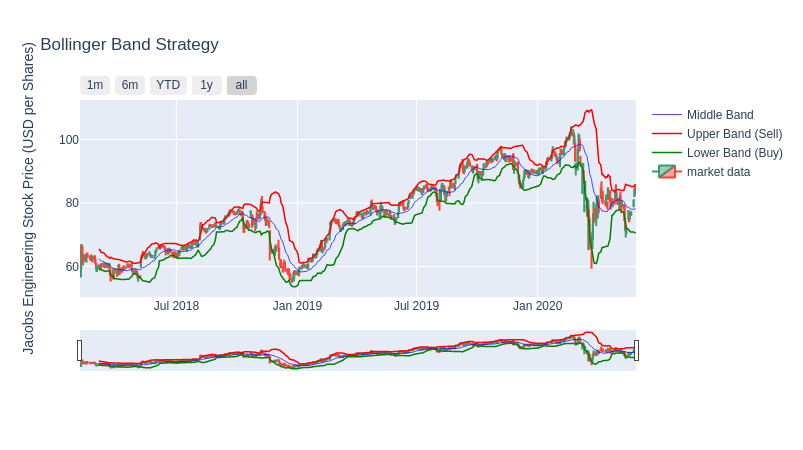

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Middle Band'], line=dict(color='blue', width=0.7), name='Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], line=dict(color='red', width=1.5), name='Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], line=dict(color='green', width=1.5), name='Lower Band (Buy)'))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='market data'))

fig.update_layout(title='Bollinger Band Strategy', yaxis_title='Jacobs Engineering Stock Price (USD per Shares)')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                        buttons=list([
                                dict(count=1, label='1m', step='month', stepmode='backward'),
                                dict(count=6, label='6m', step='month', stepmode='backward'),
                                dict(count=1, label='YTD', step='year', stepmode='todate'),
                                dict(count=1, label='1y', step='year', stepmode='backward'),
                                dict(step='all')
                                    ])
                                    )
                )

fig.show()